Tony Tong. For Harvard Ph12b 2017. 

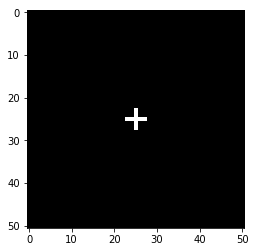

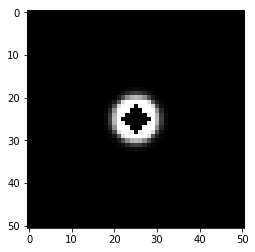

In [8]:
# convolution.py
# -------------------------------------------------------------------------
# This script creates an eLoG (elongated Laplacian of Gaussian) filter that
# emphasizes long, vertical lines in a figure.  The effect of the filter is
# demonstrated on a plus sign.
# 
# This can be pretty fun!!!
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as sim

#%% Create a grid of points for the Gaussian filter.
v = np.arange(-25, 26)
X, Y = np.meshgrid(v, v)

#%% Create elongated Gaussian filter, apply Laplacian.
##for smearing, try commenting it out or change the resolution
gauss_filter = np.exp(-0.5*(X**2/2 + Y**2/2)) 
##https://en.wikipedia.org/wiki/Discrete_Laplace_operator
##for local linear transformation
laplace_filter = np.array( [[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplace_filter = np.array( [[1, 1, 1], [1, -8, 1], [1, 1, 1]]) ##another one
combined_filter  = sim.convolve(gauss_filter, laplace_filter)

#%% Create a plus sign '+' to demonstrate effect of filter.
plus = np.zeros((51, 51))
plus[23:28, 25] = 1.0
plus[25, 23:28] = 1.0

plt.figure()
plt.imshow(plus)
plt.gray()

#%%	Apply filter to '+' and display resulting image.
#	Use vmin/vmax to emphasize features within a restricted range of intensity.
cplus = sim.convolve(plus, combined_filter)

plt.figure()
plt.imshow(cplus, vmin=0, vmax=0.5*cplus.max())
plt.gray()

plt.show()
